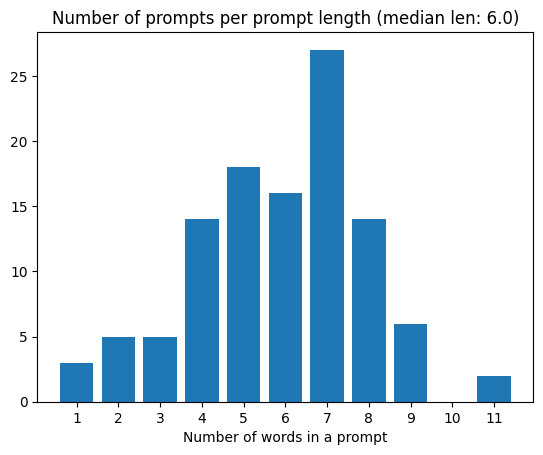

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

final_queries = pd.read_csv("../Data/Queries_IT_final.csv")

query_lengths = final_queries.query_len.value_counts().sort_index().keys().tolist()
query_len_counts = final_queries.query_len.value_counts().sort_index().values.tolist()
# print(query_lengths, query_len_counts)

fig = plt.figure()
ax = plt.bar(query_lengths, query_len_counts)
plt.xticks(list(range(min(query_lengths), max(query_lengths)+1)))
plt.xlabel("Number of words in a prompt")
plt.title("Number of prompts per prompt length (median len: " + str(round(np.median(final_queries.query_len), 2)) + ")")
plt.show()

In [22]:
final_queries.head()

,Query,Source,query_len,topic,search_type
0,Chi era il padre di Micerino ?,IT-GUI,6,history,multisteps
1,Il figlio di Chefren,IT-GUI,4,history,multisteps
2,Il padre di Micerino,IT-GUI,4,history,multisteps
3,Micerino,IT-GUI,1,history,multisteps
4,Quanto e alta la tomba di Cheope?,IT-GUI,7,history,fact


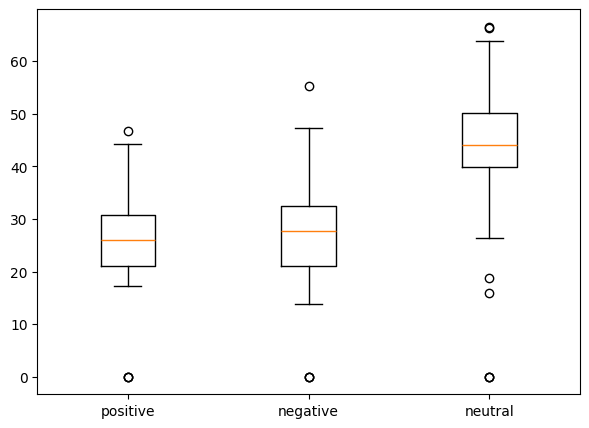

In [23]:
query_EP = pd.read_csv("../Results/query_EP.csv")

fig = plt.figure(figsize=(7,5))
ax = plt.boxplot(query_EP[["positive", "negative", "neutral"]], labels=["positive", "negative", "neutral"])
plt.show()

In [24]:
gemma_EP = pd.read_csv("../Results/gemma_EP.csv")
gemma_RQ_EP = pd.read_csv("../Results/gemma_RQ_EP.csv")
gemma_RQ_avg_EP = pd.read_csv("../Results/gemma_RQ_avg_EP.csv")

gpt_EP = pd.read_csv("../Results/gpt_EP.csv")
gpt_RQ_EP = pd.read_csv("../Results/gpt_RQ_EP.csv")
gpt_RQ_avg_EP = pd.read_csv("../Results/gpt_RQ_avg_EP.csv")


emo_features = ["positive", "negative", "neutral", "joy", "anger", "surprise", "disgust", "fear", "sadness", "trust", "expectations"]
all_EP = []

for _, row in gemma_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "OG",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_avg_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_avg",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_"+row["gender"],
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gpt_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "OG",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_avg_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_avg",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_EP.iterrows():
    for emo in emo_features:
        all_EP.append([
            row["query"],
            "RQ_"+row["gender"],
            "GPT",
            emo,
            row[emo]
        ])

all_EP_df = pd.DataFrame(all_EP, columns=["query", "query_form", "LLM", "emo_feature_name", "emo_feature_percent"])
all_EP_df.head()

,query,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,OG,Gemma,positive,30.22
1,Chi era il padre di Micerino ?,OG,Gemma,negative,28.45
2,Chi era il padre di Micerino ?,OG,Gemma,neutral,41.33
3,Chi era il padre di Micerino ?,OG,Gemma,joy,12.34
4,Chi era il padre di Micerino ?,OG,Gemma,anger,12.89


In [25]:
print(len(all_EP_df))

9680


In [26]:
all_EP_df.to_csv("../Results/all_EP.csv", index=False)

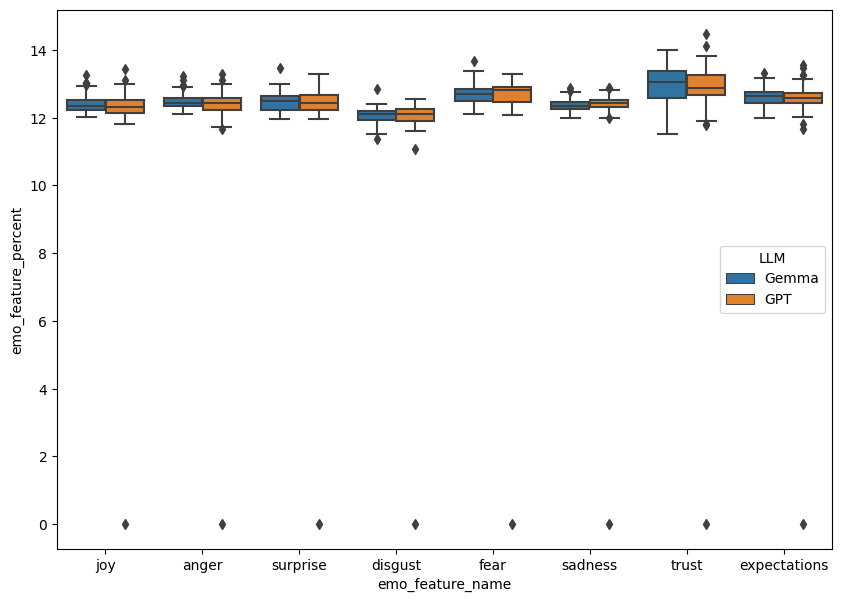

In [27]:
df = all_EP_df.loc[(all_EP_df["query_form"]=="OG") & (all_EP_df["emo_feature_name"] != "positive") & (all_EP_df["emo_feature_name"] != "negative") & (all_EP_df["emo_feature_name"] != "neutral") ]
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
plt.show()

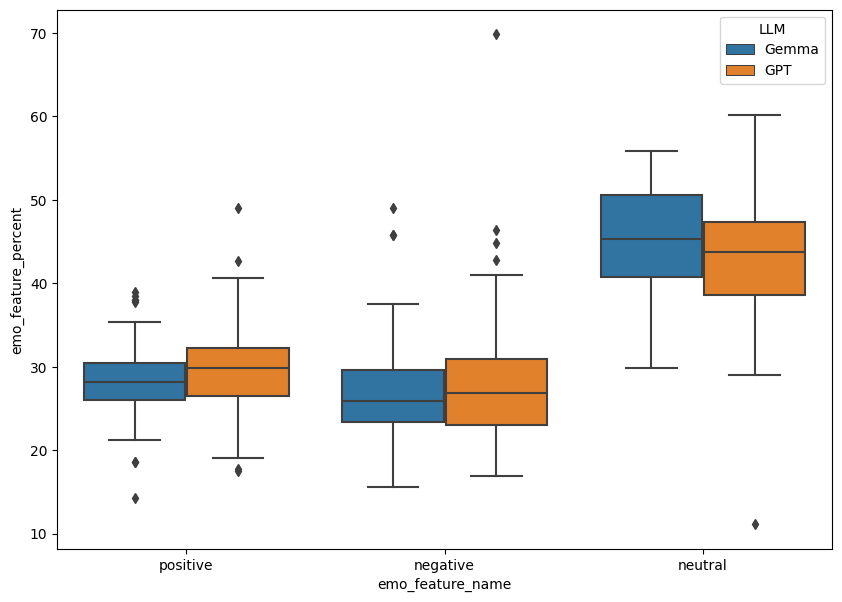

In [28]:
df = all_EP_df.loc[(all_EP_df["query_form"]=="OG") & ((all_EP_df["emo_feature_name"] == "positive") | (all_EP_df["emo_feature_name"] == "negative")  | (all_EP_df["emo_feature_name"] == "neutral"))]
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
plt.show()

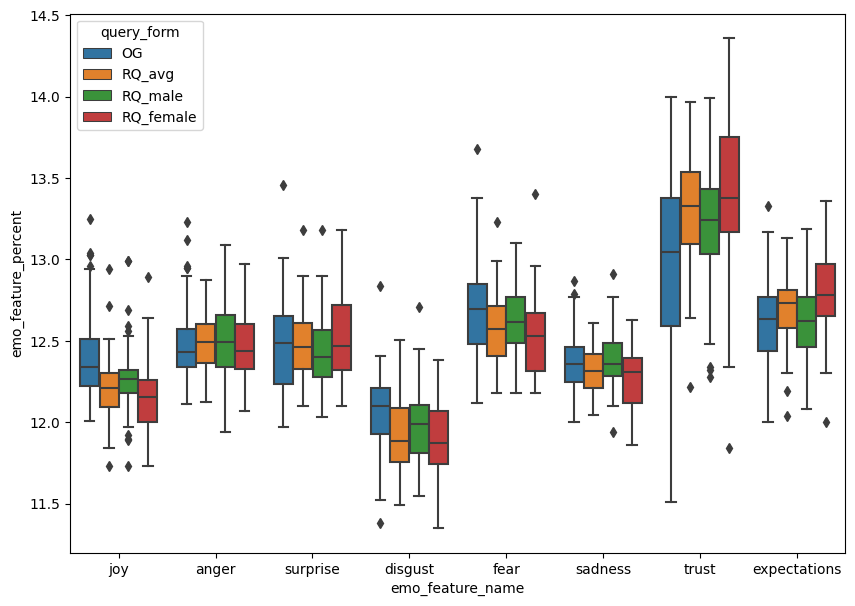

In [29]:
df = all_EP_df.loc[(all_EP_df["LLM"]=="Gemma") & (all_EP_df["emo_feature_name"] != "positive") & (all_EP_df["emo_feature_name"] != "negative") & (all_EP_df["emo_feature_name"] != "neutral")]
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df)
plt.show()

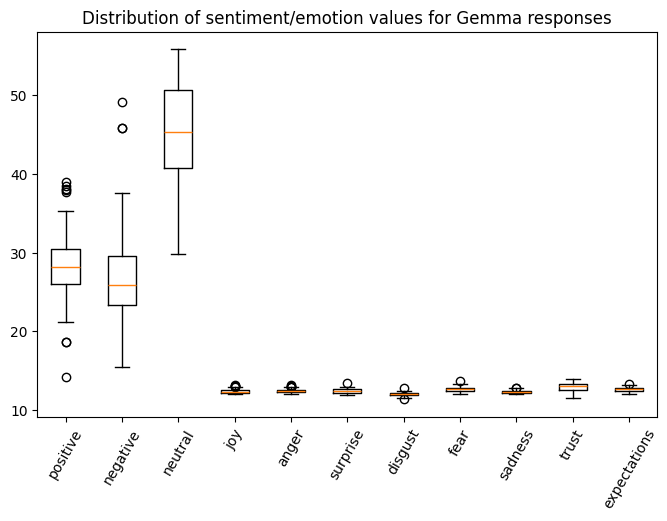

In [30]:
fig = plt.figure(figsize=(8,5))
ax = plt.boxplot(gemma_EP.drop(columns=["query", "response", "LLM"]), labels=gemma_EP.drop(columns=["query", "response", "LLM"]).columns)
plt.xticks(rotation=60)
plt.title("Distribution of sentiment/emotion values for Gemma responses")
plt.show()

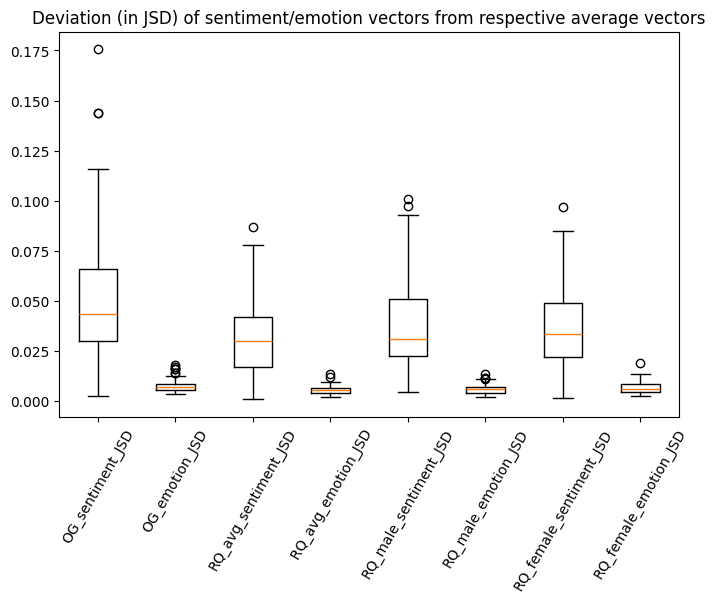

In [31]:
gemma_JSD = pd.read_csv("../Results/gemma_avg_JSD.csv")
# gemma_JSD.head()

fig = plt.figure(figsize=(8,5))
ax = plt.boxplot(gemma_JSD.drop(columns=["query"]), labels=gemma_JSD.drop(columns=["query"]).columns)
plt.xticks(rotation=60)
plt.title("Deviation (in JSD) of sentiment/emotion vectors from respective average vectors")
plt.show()
